# Confusion Matrix

## Remarks
- It evaluates the performance of a classification model by comparing the predicted labels agains the actual ones.
- We can breakdown confusion matrix into measurements such as **accuracy**, **precision**, **recall**, and **f1-score**.
- **Precision** is typically used along with **recall**.
- **F1-score** is the *harmonic mean* of **precision** and **recall** - it gives more weight <br>to low value, that means, the classifier get a high **f1-score** if both **precision** and **recall** are high.

## Implementation

Predict whether customers will default on their credit card paymentes (Binary classification). <br>
Generate dummy data with only 25% default rate.

,income,credit_score,age,default
0,57450.712295,719.967772,33.248217,1
1,47926.035482,696.231684,38.554813,1
2,59715.328072,652.981518,32.075801,0
3,72845.447846,617.653161,36.920385,1
4,46487.699379,684.911166,21.063853,0


Confusion Matrix:
[[166  65]
 [ 45  24]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       231
           1       0.27      0.35      0.30        69

    accuracy                           0.63       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.67      0.63      0.65       300



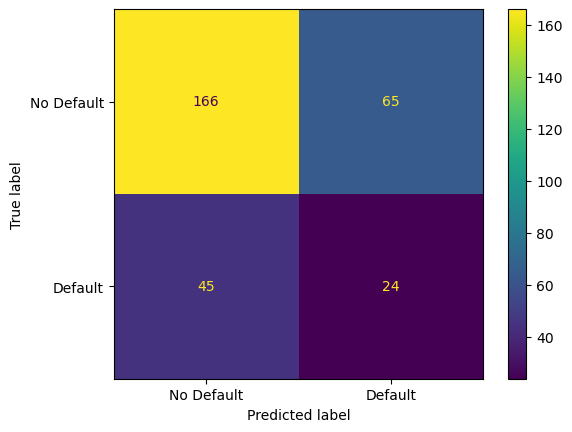

In [123]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

#. Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#. Generate dummy data
np.random.seed(42)
num_samples = 1000

data = pd.DataFrame({
    'income': np.random.normal(50000, 15000, num_samples).clip(20000, 100000),
    'credit_score': np.random.normal(650, 50, num_samples).clip(300, 850),
    'age': np.random.normal(40, 10, num_samples).clip(18, 75),
    'default': np.random.choice([0, 1], size=num_samples, p=[0.75, 0.25]) 
})

#. Display a few rows
display(data.head())

#. Split data
features = ["income", "credit_score", "age"]
X = data[features]
y = data["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

#. Handle imbalance by oversampling 
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

#. Build model
rf_model = RandomForestClassifier(
    class_weight="balanced", n_estimators=1000, random_state=42)
rf_model.fit(x_train_balanced, y_train_balanced)

#. Predict default
y_pred = rf_model.predict(X_test)

#. Evaluate prediction
cm_eval = confusion_matrix(y_test, y_pred)
cmd_eval = ConfusionMatrixDisplay(
    confusion_matrix=cm_eval, display_labels=["No Default", "Default"])
clf_report = classification_report(y_test, y_pred)

#. Display results
print("Confusion Matrix:")
print(cm_eval)

cmd_eval.plot()

print(clf_report)

**REMARKS**:
- The model doesn't do a good job, even though we oversampling the minority class - handling imbalance problem. However, the purpose of this notebook is to present the application of **confusion matrix**.
- Based on the **confusion matrix**, we have many false-negatives (FN), defaulters missed by the model, and false-positives (FP), Non-defaulters incorrectly flagged as defaulters.
- From the classificationreport, we clearly see that the model has problems in detecting defaults.